# Balanced sampling of data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import seaborn as sns

In [5]:
from src import data_handling as dh

from src import plot

In [6]:
%load_ext autoreload
%autoreload 2

## Load Data

In [7]:
bp_cancer = dh.Dataset("Cancer", "BluePrint")

`subsampling=2` increases the dataset by 25% to include some of the cells with expression |ESR1|<0.5

In [8]:
bp_cancer.set_XY(subsampling=2)

# Building model

In [9]:
params = {
        'eta' : 0.05, 
        'max_depth' : 6,
        'n_estimators':200,
        'subsample' : 1, 
        'colsample_bytree' : 1,
        'eval_metric' :  'rmse',
        'n_jobs' : 30
}

In [10]:
X_train, X_test, y_train, y_test = bp_cancer.train_test_split(stratify="target", random_state=10)

In [11]:
model =  xgb.XGBRegressor(**params)

In [12]:
model.fit(X_train, y_train, verbose=10, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:1.74992	validation_1-rmse:1.75941
[10]	validation_0-rmse:1.32545	validation_1-rmse:1.50880
[20]	validation_0-rmse:1.05393	validation_1-rmse:1.36297
[30]	validation_0-rmse:0.87239	validation_1-rmse:1.27825
[40]	validation_0-rmse:0.74792	validation_1-rmse:1.22912
[50]	validation_0-rmse:0.66069	validation_1-rmse:1.19524
[60]	validation_0-rmse:0.59932	validation_1-rmse:1.18219
[70]	validation_0-rmse:0.54412	validation_1-rmse:1.17027
[80]	validation_0-rmse:0.49498	validation_1-rmse:1.16384
[90]	validation_0-rmse:0.45913	validation_1-rmse:1.15732
[100]	validation_0-rmse:0.42636	validation_1-rmse:1.15358
[110]	validation_0-rmse:0.39537	validation_1-rmse:1.15031
[120]	validation_0-rmse:0.37103	validation_1-rmse:1.14847
[130]	validation_0-rmse:0.35012	validation_1-rmse:1.14684
[140]	validation_0-rmse:0.33358	validation_1-rmse:1.14589
[150]	validation_0-rmse:0.31677	validation_1-rmse:1.14545
[160]	validation_0-rmse:0.30250	validation_1-rmse:1.14545
[170]	validation_0-rmse:0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.05, eval_metric='rmse', gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=30, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [35]:
model.save_model("/data/severs/xgb_model_subsampled.model")

In [10]:
prediction = model.predict(X_test)

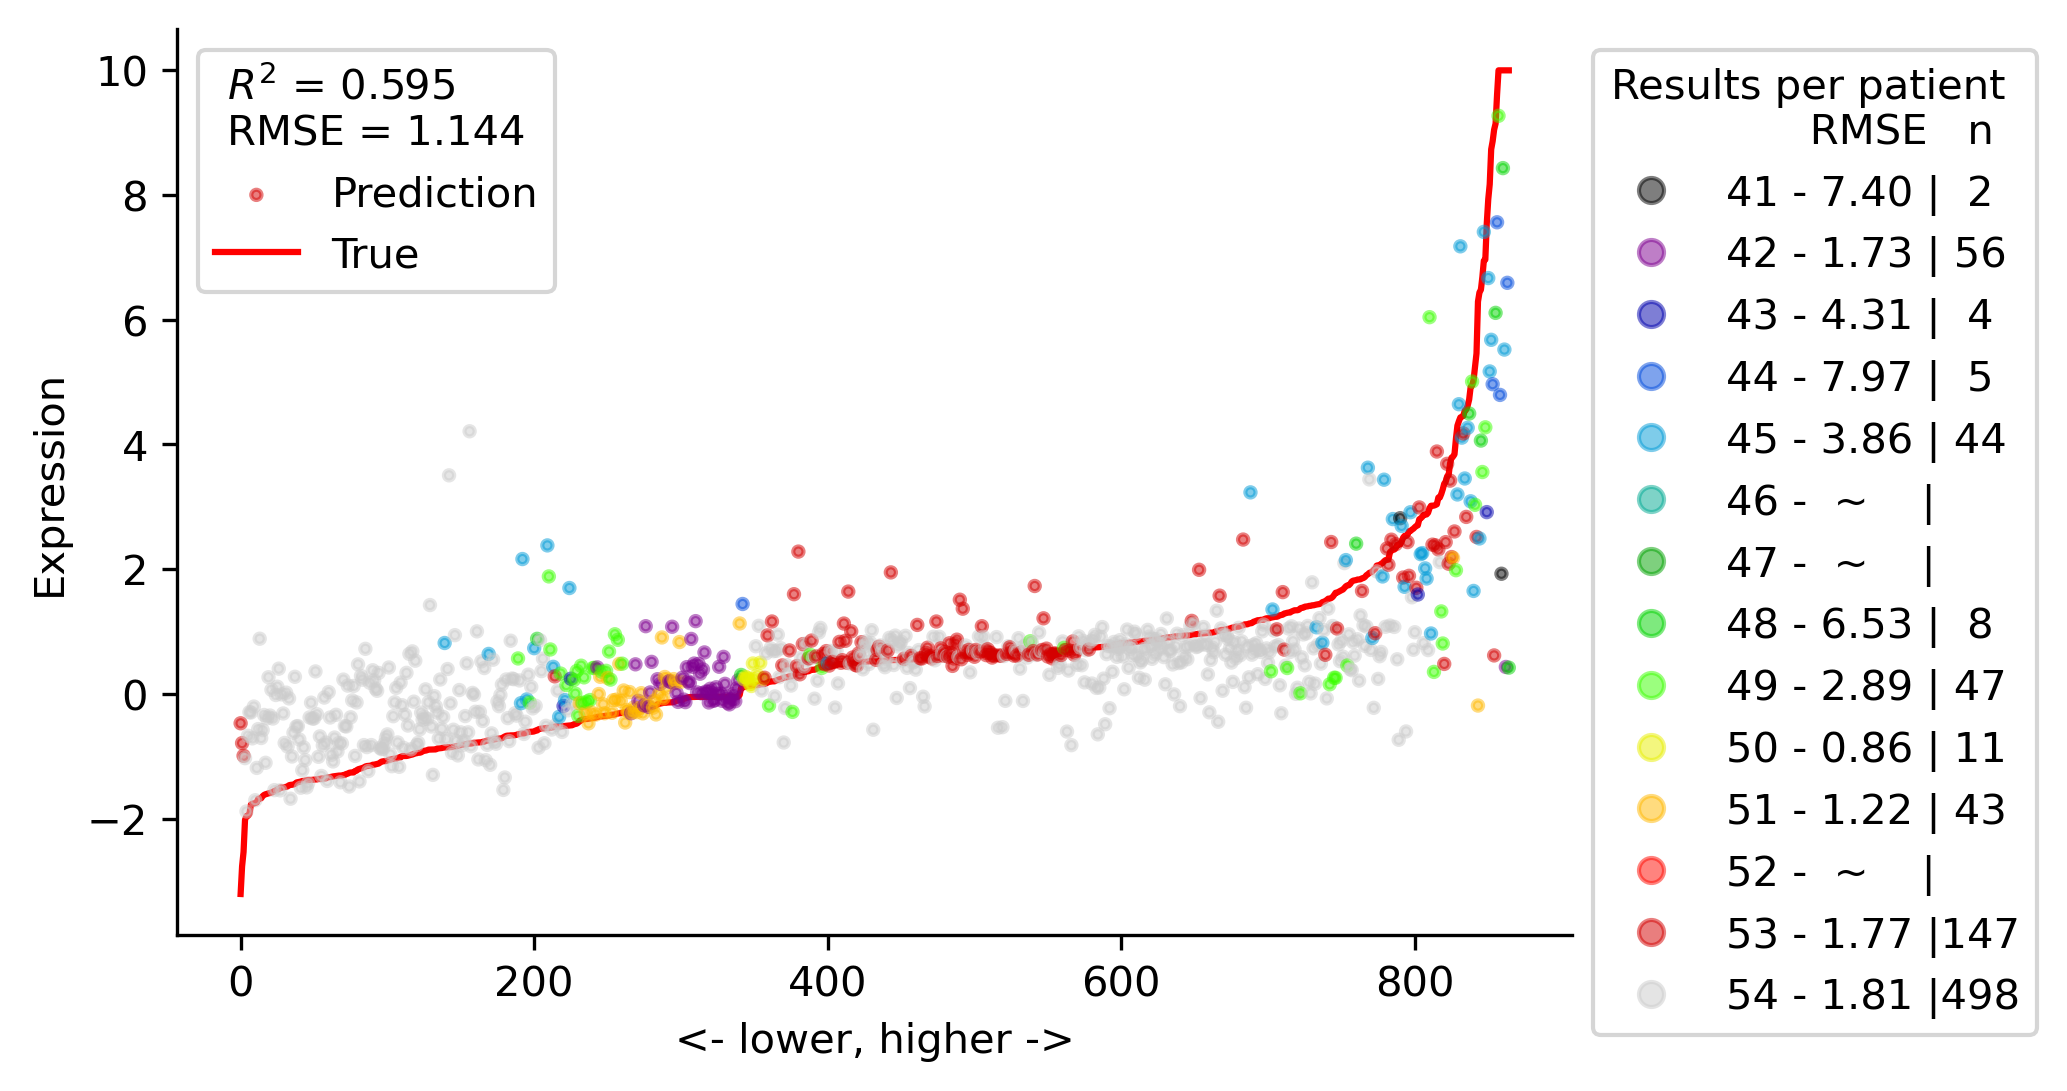

In [34]:
fig, ax = plt.subplots(dpi=300)
plot.plot_prediction(y_test,
                  prediction,
                  cmap="nipy_spectral",
                  fig=fig,
                  ax=ax, 
                  c=bp_cancer.split["patient_number_test"])
plt.show()

# Shapley analysis

In [13]:
import shap

In [14]:
explainer = shap.TreeExplainer(model)
shap_vals = explainer(bp_cancer.data)

AttributeError: 'Dataset' object has no attribute 'data'

In [1]:
shap.summary_plot(shap_vals, X_test)

NameError: name 'shap' is not defined